#Ev Fiyat Tahmin Modeli:


##İş Problemi

Herbir eve ait özelliklerin ve ev fiyatlarının bulunduğu veri seti kullanılarak,farklı tipteki evlerin fiyatlarına ilişkin bir makine öğrenmesi projesi gerçekleştirilmek istenmektedir.


##Veri Seti Hikayesi

Ames, Lowa’dakikonut evlerinden oluşan bu veri seti içerisinde 79 açıklayıcı değişken bulunduruyor. Kaggleüzerinde bir yarışması da bulunan projenin veri seti ve yarışma sayfasına aşağıdaki linkten ulaşabilirsiniz. Veri seti bir kaggleyarışmasına ait olduğundan dolayı trainve test olmak üzere iki farklı csvdosyası vardır. Test veri setinde ev fiyatları boş bırakılmış olup, bu değerleri sizin  tahmin etmeniz beklenmektedir


In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as plt
import warnings

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

import math

from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import lightgbm as lgb

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)


from scipy import stats
from scipy.stats import norm, skew #for some statistics


#Görev 1: Keşifçi Veri Analizi

Adım 1: Train ve Test veri setlerini okutup birleştiriniz. Birleştirdiğiniz veri üzerinden ilerleyiniz.

Adım 2:  Numerikvekategorikdeğişkenleriyakalayınız.

Adım 3: Gerekli düzenlemeleri yapınız. (Tip hatası olan değişkenler gibi)

Adım 4:  Numerik ve kategorik değişkenlerin veri içindeki dağılımını gözlemleyiniz.

Adım 5: Kategorik değişkenler ile hedef değişken incelemesini yapınız.

Adım 6: Aykırı gözlem var mı inceleyiniz.

Adım 7: Eksik gözlem var mı inceleyiniz.


MSSubClass: Identifies the type of dwelling involved in the sale.

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.

       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park
       RM	Residential Medium Density

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

       Grvl	Gravel
       Pave	Paved

Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

LotShape: General shape of property

       Reg	Regular
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
LandContour: Flatness of the property

       Lvl	Near Flat/Level
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression

Utilities: Type of utilities available

       AllPub	All public Utilities (E,G,W,& S)
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only

LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property

LandSlope: Slope of property

       Gtl	Gentle slope
       Mod	Moderate Slope
       Sev	Severe Slope

Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker

Condition1: Proximity to various conditions

       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street
       Norm	Normal
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

Condition2: Proximity to various conditions (if more than one is present)

       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street
       Norm	Normal
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

BldgType: Type of dwelling

       1Fam	Single-family Detached
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit

HouseStyle: Style of dwelling

       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed

RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles

Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone

MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

ExterCond: Evaluates the present condition of the material on the exterior

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

Foundation: Type of foundation

       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete
       Slab	Slab
       Stone	Stone
       Wood	Wood

BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement

BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating

       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace

HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

CentralAir: Central air conditioning

       N	No
       Y	Yes

Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only

Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

GarageType: Garage location

       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage

GarageYrBlt: Year garage was built

GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished
       Unf	Unfinished
       NA	No Garage

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

PavedDrive: Paved driveway

       Y	Paved
       P	Partial Pavement
       N	Dirt/Gravel

WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

Fence: Fence quality

       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence

MiscFeature: Miscellaneous feature not covered in other categories

       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale

       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other

SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)


In [2]:
#Adım 1: Train ve Test veri setlerini okutup birleştiriniz. Birleştirdiğiniz veri üzerinden ilerleyiniz
# Load the datasets
train_df = pd.read_csv('/content/sample_data/train.csv')
test_df = pd.read_csv('/content/sample_data/test.csv')
# Merge the datasets
house_df = pd.concat([train_df, test_df], ignore_index=True)

In [80]:
train_df.head()

,LotFrontage,LotArea,Street,Alley,LandContour,LandSlope,Neighborhood,Condition1,Condition2,BldgType,OverallQual,OverallCond,RoofMatl,MasVnrArea,BsmtCond,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Heating,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Functional,Fireplaces,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,PoolArea,PoolQC,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,Age,IsRemod,TotalSF,Total_Bathrooms,Total_Porch_SF,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_RM,MSZoning_Rare,LotShape_Rare,LotShape_Reg,LotConfig_Inside,LotConfig_Rare,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Rare,RoofStyle_Hip,RoofStyle_Rare,Exterior1st_MetalSd,Exterior1st_Rare,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_MetalSd,Exterior2nd_Rare,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_None,MasVnrType_Rare,ExterQual_Rare,ExterQual_TA,ExterCond_Rare,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Rare,BsmtQual_Rare,BsmtQual_TA,BsmtExposure_No,BsmtExposure_Rare,BsmtFinType1_GLQ,BsmtFinType1_Rare,BsmtFinType1_Unf,HeatingQC_Gd,HeatingQC_Rare,HeatingQC_TA,KitchenQual_Rare,KitchenQual_TA,FireplaceQu_None,FireplaceQu_Rare,FireplaceQu_TA,GarageType_Detchd,GarageType_Rare,GarageFinish_RFn,GarageFinish_Rare,GarageFinish_Unf,Fence_None,Fence_Rare,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9
0,65.0,8450,0,0,0,0,1,0,0,0,7,5,0,196.0,1,706.0,1,0.0,150.0,0,1,1,0,1710,3,1,8,1,0,2003.0,2.0,548.0,1,1,1,0,0,0,0,0,1,0,208500.0,5,0,2566.0,3.5,61,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1,80.0,9600,0,0,0,0,1,1,0,0,6,8,0,0.0,1,978.0,1,0.0,284.0,0,1,1,0,1262,3,1,6,1,1,1976.0,2.0,460.0,1,1,1,298,0,0,0,0,1,0,181500.0,31,0,2524.0,2.5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,68.0,11250,0,0,0,0,1,0,0,0,7,5,0,162.0,1,486.0,1,0.0,434.0,0,1,1,0,1786,3,1,6,1,1,2001.0,2.0,608.0,1,1,1,0,0,0,0,0,1,0,223500.0,7,1,2706.0,3.5,42,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,60.0,9550,0,0,0,0,1,0,0,0,7,5,0,0.0,0,216.0,1,0.0,540.0,0,1,1,0,1717,3,1,7,1,1,1998.0,3.0,642.0,1,1,1,0,0,0,0,0,1,1,140000.0,91,1,2473.0,2.0,307,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0
4,84.0,14260,0,0,0,0,1,0,0,0,8,5,0,350.0,1,655.0,1,0.0,490.0,0,1,1,0,2198,4,1,9,1,1,2000.0,3.0,836.0,1,1,1,192,0,0,0,0,1,0,250000.0,8,0,3343.0,3.5,84,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0


In [3]:
# Display the first few rows of the merged dataframe
print(house_df.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd       TA           No          GLQ       706.0          Unf         0.0      150.0        856.0    GasA        Ex          Y      SBrkr       856       854             0   
1   

In [4]:
# Display information about the merged dataframe
house_df.drop("Id", axis = 1, inplace = True)

In [5]:
house_df.shape

(2919, 80)

In [6]:
# Adım 2:  Numerik ve kategorik değişkenleri yakalayınız
def grab_col_names(dataframe, cat_th=2, car_th=30):
    """
        Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f"  -> İsimleri: {cat_cols}")
    print(f'num_cols: {len(num_cols)}')
    print(f"  -> İsimleri: {num_cols}")
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f"  -> İsimleri: {cat_but_car}")
    print(f'num_but_cat: {len(num_but_cat)}')
    print(f"  -> İsimleri: {num_but_cat}")
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(house_df)


Observations: 2919
Variables: 80
cat_cols: 43
  -> İsimleri: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
num_cols: 37
  -> İsimleri: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fir

In [7]:
# Adım 3: Gerekli düzenlemeleri yapınız. (Tip hatası olan değişkenler gibi)


# The `MSSubClass` column is numeric but represents a type of dwelling,
# which is inherently categorical. We should convert its data type to object.
house_df['MSSubClass'] = house_df['MSSubClass'].astype(object)


#year built--> Bunu yaşa çevir
#IsRemodeling? --> YearRemodAdd

In [8]:
# Cat. ve numerik kolonlara tekrar bak
cat_cols, num_cols, cat_but_car = grab_col_names(house_df)

Observations: 2919
Variables: 80
cat_cols: 44
  -> İsimleri: ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
num_cols: 36
  -> İsimleri: ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fir

In [9]:
#Adım 4:  Numerik ve kategorik değişkenlerin veri içindeki dağılımını gözlemleyiniz.

# Plot distributions for numeric variables
num_plots = make_subplots(rows=(len(num_cols) + 1) // 2, cols=2,
                          subplot_titles=[f'Distribution of {col}' for col in num_cols])

for i, col in enumerate(num_cols):
    row = (i // 2) + 1
    col_pos = (i % 2) + 1
    num_plots.add_trace(go.Histogram(x=house_df[col].dropna(), name=col), row=row, col=col_pos)

num_plots.update_layout(height=(len(num_cols) + 1) // 2 * 300, title_text="Distributions of Numeric Variables")
num_plots.show()

# Plot distributions for categorical variables
cat_plots = make_subplots(rows=(len(cat_cols) + 1) // 2, cols=2,
                          subplot_titles=[f'Distribution of {col}' for col in cat_cols])

for i, col in enumerate(cat_cols):
    row = (i // 2) + 1
    col_pos = (i % 2) + 1
    cat_plots.add_trace(go.Histogram(x=house_df[col].dropna(), name=col), row=row, col=col_pos)

cat_plots.update_layout(height=(len(cat_cols) + 1) // 2 * 300, title_text="Distributions of Categorical Variables")
cat_plots.show()


In [10]:
#Bu Özniteliklere dikkat:

#Overall Quality and cond--> Gruplandırma
#Year built, remode, YrSold--> Converts to Age
#MasVnrArea, BsmtFinSF2, MiscVal --> Çoğunluk bir alanda
#LowQualFinSF, PoolArea --> Asla alma

#Kategorikler:
#Street/Utilites/RoofMatl--> Çoğunluk bir yerde

In [11]:
# Adım 4: Kategorik değişkenler ile hedef değişken incelemesini yapınız.
# Kategorik kolonların her değeri için Sale Price ortalama ve dağılımını göster
for col in cat_cols:
    if col != "SalePrice": # 'SalePrice' is the target, not a feature
        print(f"Analyzing {col} vs SalePrice")
        fig = px.box(house_df.dropna(subset=['SalePrice']), x=col, y='SalePrice',
                     title=f'SalePrice distribution by {col}')
        fig.update_layout(height=400)
        fig.show()

        # Calculate mean SalePrice for each category
        mean_saleprice = house_df.dropna(subset=['SalePrice']).groupby(col)['SalePrice'].mean().reset_index()
        print(f"Mean SalePrice for each category in {col}:")
        print(mean_saleprice)
        print("-" * 30)

Analyzing MSSubClass vs SalePrice


Mean SalePrice for each category in MSSubClass:
    MSSubClass      SalePrice
0           20  185224.811567
1           30   95829.724638
2           40  156125.000000
3           45  108591.666667
4           50  143302.972222
5           60  239948.501672
6           70  166772.416667
7           75  192437.500000
8           80  169736.551724
9           85  147810.000000
10          90  133541.076923
11         120  200779.080460
12         160  138647.380952
13         180  102300.000000
14         190  129613.333333
------------------------------
Analyzing MSZoning vs SalePrice


Mean SalePrice for each category in MSZoning:
  MSZoning      SalePrice
0  C (all)   74528.000000
1       FV  214014.061538
2       RH  131558.375000
3       RL  191004.994787
4       RM  126316.830275
------------------------------
Analyzing Street vs SalePrice


Mean SalePrice for each category in Street:
  Street      SalePrice
0   Grvl  130190.500000
1   Pave  181130.538514
------------------------------
Analyzing Alley vs SalePrice


Mean SalePrice for each category in Alley:
  Alley      SalePrice
0  Grvl  122219.080000
1  Pave  168000.585366
------------------------------
Analyzing LotShape vs SalePrice


Mean SalePrice for each category in LotShape:
  LotShape      SalePrice
0      IR1  206101.665289
1      IR2  239833.365854
2      IR3  216036.500000
3      Reg  164754.818378
------------------------------
Analyzing LandContour vs SalePrice


Mean SalePrice for each category in LandContour:
  LandContour      SalePrice
0         Bnk  143104.079365
1         HLS  231533.940000
2         Low  203661.111111
3         Lvl  180183.746758
------------------------------
Analyzing Utilities vs SalePrice


Mean SalePrice for each category in Utilities:
  Utilities     SalePrice
0    AllPub  180950.95682
1    NoSeWa  137500.00000
------------------------------
Analyzing LotConfig vs SalePrice


Mean SalePrice for each category in LotConfig:
  LotConfig      SalePrice
0    Corner  181623.425856
1   CulDSac  223854.617021
2       FR2  177934.574468
3       FR3  208475.000000
4    Inside  176938.047529
------------------------------
Analyzing LandSlope vs SalePrice


Mean SalePrice for each category in LandSlope:
  LandSlope      SalePrice
0       Gtl  179956.799566
1       Mod  196734.138462
2       Sev  204379.230769
------------------------------
Analyzing Neighborhood vs SalePrice


Mean SalePrice for each category in Neighborhood:
   Neighborhood      SalePrice
0       Blmngtn  194870.882353
1       Blueste  137500.000000
2        BrDale  104493.750000
3       BrkSide  124834.051724
4       ClearCr  212565.428571
5       CollgCr  197965.773333
6       Crawfor  210624.725490
7       Edwards  128219.700000
8       Gilbert  192854.506329
9        IDOTRR  100123.783784
10      MeadowV   98576.470588
11      Mitchel  156270.122449
12        NAmes  145847.080000
13      NPkVill  142694.444444
14       NWAmes  189050.068493
15      NoRidge  335295.317073
16      NridgHt  316270.623377
17      OldTown  128225.300885
18        SWISU  142591.360000
19       Sawyer  136793.135135
20      SawyerW  186555.796610
21      Somerst  225379.837209
22      StoneBr  310499.000000
23       Timber  242247.447368
24      Veenker  238772.727273
------------------------------
Analyzing Condition1 vs SalePrice


Mean SalePrice for each category in Condition1:
  Condition1      SalePrice
0     Artery  135091.666667
1      Feedr  142475.481481
2       Norm  184495.492063
3       PosA  225875.000000
4       PosN  215184.210526
5       RRAe  138400.000000
6       RRAn  184396.615385
7       RRNe  190750.000000
8       RRNn  212400.000000
------------------------------
Analyzing Condition2 vs SalePrice


Mean SalePrice for each category in Condition2:
  Condition2      SalePrice
0     Artery  106500.000000
1      Feedr  121166.666667
2       Norm  181169.405536
3       PosA  325000.000000
4       PosN  284875.000000
5       RRAe  190000.000000
6       RRAn  136905.000000
7       RRNn   96750.000000
------------------------------
Analyzing BldgType vs SalePrice


Mean SalePrice for each category in BldgType:
  BldgType      SalePrice
0     1Fam  185763.807377
1   2fmCon  128432.258065
2   Duplex  133541.076923
3    Twnhs  135911.627907
4   TwnhsE  181959.342105
------------------------------
Analyzing HouseStyle vs SalePrice


Mean SalePrice for each category in HouseStyle:
  HouseStyle      SalePrice
0     1.5Fin  143116.740260
1     1.5Unf  110150.000000
2     1Story  175985.477961
3     2.5Fin  220000.000000
4     2.5Unf  157354.545455
5     2Story  210051.764045
6     SFoyer  135074.486486
7       SLvl  166703.384615
------------------------------
Analyzing RoofStyle vs SalePrice


Mean SalePrice for each category in RoofStyle:
  RoofStyle      SalePrice
0      Flat  194690.000000
1     Gable  171483.956179
2   Gambrel  148909.090909
3       Hip  218876.933566
4   Mansard  180568.428571
5      Shed  225000.000000
------------------------------
Analyzing RoofMatl vs SalePrice


Mean SalePrice for each category in RoofMatl:
  RoofMatl      SalePrice
0  ClyTile  160000.000000
1  CompShg  179803.679219
2  Membran  241500.000000
3    Metal  180000.000000
4     Roll  137000.000000
5  Tar&Grv  185406.363636
6  WdShake  241400.000000
7  WdShngl  390250.000000
------------------------------
Analyzing Exterior1st vs SalePrice


Mean SalePrice for each category in Exterior1st:
   Exterior1st      SalePrice
0      AsbShng  107385.550000
1      AsphShn  100000.000000
2      BrkComm   71000.000000
3      BrkFace  194573.000000
4       CBlock  105000.000000
5      CemntBd  231690.655738
6      HdBoard  163077.450450
7      ImStucc  262000.000000
8      MetalSd  149422.177273
9      Plywood  175942.379630
10       Stone  258500.000000
11      Stucco  162990.000000
12     VinylSd  213732.900971
13     Wd Sdng  149841.645631
14     WdShing  150655.076923
------------------------------
Analyzing Exterior2nd vs SalePrice


Mean SalePrice for each category in Exterior2nd:
   Exterior2nd      SalePrice
0      AsbShng  114060.550000
1      AsphShn  138000.000000
2      Brk Cmn  126714.285714
3      BrkFace  195818.000000
4       CBlock  105000.000000
5      CmentBd  230093.833333
6      HdBoard  167661.565217
7      ImStucc  252070.000000
8      MetalSd  149803.172897
9        Other  319000.000000
10     Plywood  168112.387324
11       Stone  158224.800000
12      Stucco  155905.153846
13     VinylSd  214432.460317
14     Wd Sdng  148386.065990
15     Wd Shng  161328.947368
------------------------------
Analyzing MasVnrType vs SalePrice


Mean SalePrice for each category in MasVnrType:
  MasVnrType      SalePrice
0     BrkCmn  146318.066667
1    BrkFace  204691.871910
2      Stone  265583.625000
------------------------------
Analyzing ExterQual vs SalePrice


Mean SalePrice for each category in ExterQual:
  ExterQual      SalePrice
0        Ex  367360.961538
1        Fa   87985.214286
2        Gd  231633.510246
3        TA  144341.313466
------------------------------
Analyzing ExterCond vs SalePrice


Mean SalePrice for each category in ExterCond:
  ExterCond      SalePrice
0        Ex  201333.333333
1        Fa  102595.142857
2        Gd  168897.568493
3        Po   76500.000000
4        TA  184034.896256
------------------------------
Analyzing Foundation vs SalePrice


Mean SalePrice for each category in Foundation:
  Foundation      SalePrice
0     BrkTil  132291.075342
1     CBlock  149805.714511
2      PConc  225230.442040
3       Slab  107365.625000
4      Stone  165959.166667
5       Wood  185666.666667
------------------------------
Analyzing BsmtQual vs SalePrice


Mean SalePrice for each category in BsmtQual:
  BsmtQual      SalePrice
0       Ex  327041.041322
1       Fa  115692.028571
2       Gd  202688.478964
3       TA  140759.818182
------------------------------
Analyzing BsmtCond vs SalePrice


Mean SalePrice for each category in BsmtCond:
  BsmtCond      SalePrice
0       Fa  121809.533333
1       Gd  213599.907692
2       Po   64000.000000
3       TA  183632.620900
------------------------------
Analyzing BsmtExposure vs SalePrice


Mean SalePrice for each category in BsmtExposure:
  BsmtExposure      SalePrice
0           Av  206643.420814
1           Gd  257689.805970
2           Mn  192789.657895
3           No  165652.295908
------------------------------
Analyzing BsmtFinType1 vs SalePrice


Mean SalePrice for each category in BsmtFinType1:
  BsmtFinType1      SalePrice
0          ALQ  161573.068182
1          BLQ  149493.655405
2          GLQ  235413.720096
3          LwQ  151852.702703
4          Rec  146889.248120
5          Unf  170670.576744
------------------------------
Analyzing BsmtFinType2 vs SalePrice


Mean SalePrice for each category in BsmtFinType2:
  BsmtFinType2      SalePrice
0          ALQ  209942.105263
1          BLQ  151101.000000
2          GLQ  180982.142857
3          LwQ  164364.130435
4          Rec  164917.129630
5          Unf  184694.690287
------------------------------
Analyzing Heating vs SalePrice


Mean SalePrice for each category in Heating:
  Heating      SalePrice
0   Floor   72500.000000
1    GasA  182021.195378
2    GasW  166632.166667
3    Grav   75271.428571
4    OthW  125750.000000
5    Wall   92100.000000
------------------------------
Analyzing HeatingQC vs SalePrice


Mean SalePrice for each category in HeatingQC:
  HeatingQC      SalePrice
0        Ex  214914.429150
1        Fa  123919.489796
2        Gd  156858.871369
3        Po   87000.000000
4        TA  142362.876168
------------------------------
Analyzing CentralAir vs SalePrice


Mean SalePrice for each category in CentralAir:
  CentralAir      SalePrice
0          N  105264.073684
1          Y  186186.709890
------------------------------
Analyzing Electrical vs SalePrice


Mean SalePrice for each category in Electrical:
  Electrical      SalePrice
0      FuseA  122196.893617
1      FuseF  107675.444444
2      FuseP   97333.333333
3        Mix   67000.000000
4      SBrkr  186825.113193
------------------------------
Analyzing KitchenQual vs SalePrice


Mean SalePrice for each category in KitchenQual:
  KitchenQual      SalePrice
0          Ex  328554.670000
1          Fa  105565.205128
2          Gd  212116.023891
3          TA  139962.511565
------------------------------
Analyzing Functional vs SalePrice


Mean SalePrice for each category in Functional:
  Functional      SalePrice
0       Maj1  153948.142857
1       Maj2   85800.000000
2       Min1  146385.483871
3       Min2  144240.647059
4        Mod  168393.333333
5        Sev  129000.000000
6        Typ  183429.147059
------------------------------
Analyzing FireplaceQu vs SalePrice


Mean SalePrice for each category in FireplaceQu:
  FireplaceQu      SalePrice
0          Ex  337712.500000
1          Fa  167298.484848
2          Gd  226351.415789
3          Po  129764.150000
4          TA  205723.488818
------------------------------
Analyzing GarageType vs SalePrice


Mean SalePrice for each category in GarageType:
  GarageType      SalePrice
0     2Types  151283.333333
1     Attchd  202892.656322
2    Basment  160570.684211
3    BuiltIn  254751.738636
4    CarPort  109962.111111
5     Detchd  134091.162791
------------------------------
Analyzing GarageFinish vs SalePrice


Mean SalePrice for each category in GarageFinish:
  GarageFinish      SalePrice
0          Fin  240052.690341
1          RFn  202068.869668
2          Unf  142156.423140
------------------------------
Analyzing GarageQual vs SalePrice


Mean SalePrice for each category in GarageQual:
  GarageQual      SalePrice
0         Ex  241000.000000
1         Fa  123573.354167
2         Gd  215860.714286
3         Po  100166.666667
4         TA  187489.836003
------------------------------
Analyzing GarageCond vs SalePrice


Mean SalePrice for each category in GarageCond:
  GarageCond      SalePrice
0         Ex  124000.000000
1         Fa  114654.028571
2         Gd  179930.000000
3         Po  108500.000000
4         TA  187885.735294
------------------------------
Analyzing PavedDrive vs SalePrice


Mean SalePrice for each category in PavedDrive:
  PavedDrive      SalePrice
0          N  115039.122222
1          P  132330.000000
2          Y  186433.973881
------------------------------
Analyzing PoolQC vs SalePrice


Mean SalePrice for each category in PoolQC:
  PoolQC  SalePrice
0     Ex   490000.0
1     Fa   215500.0
2     Gd   201990.0
------------------------------
Analyzing Fence vs SalePrice


Mean SalePrice for each category in Fence:
   Fence      SalePrice
0  GdPrv  178927.457627
1   GdWo  140379.314815
2  MnPrv  148751.089172
3   MnWw  134286.363636
------------------------------
Analyzing MiscFeature vs SalePrice


Mean SalePrice for each category in MiscFeature:
  MiscFeature      SalePrice
0        Gar2  170750.000000
1        Othr   94000.000000
2        Shed  151187.612245
3        TenC  250000.000000
------------------------------
Analyzing SaleType vs SalePrice


Mean SalePrice for each category in SaleType:
  SaleType      SalePrice
0      COD  143973.255814
1      CWD  210600.000000
2      Con  269600.000000
3    ConLD  138780.888889
4    ConLI  200390.000000
5    ConLw  143700.000000
6      New  274945.418033
7      Oth  119850.000000
8       WD  173401.836622
------------------------------
Analyzing SaleCondition vs SalePrice


Mean SalePrice for each category in SaleCondition:
  SaleCondition      SalePrice
0       Abnorml  146526.623762
1       AdjLand  104125.000000
2        Alloca  167377.416667
3        Family  149600.000000
4        Normal  175202.219533
5       Partial  272291.752000
------------------------------


In [12]:
#Adım 6: Aykırı gözlem var mı inceleyiniz. Öncesinde Numerik değerleri tanıyalım
house_df.describe([0.01, 0.05, 0.25, 0.50, 0.75, 0.95, 0.99]).T

,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
LotFrontage,2433.0,69.305795,23.344905,21.0,21.00,32.00,59.0,68.0,80.0,107.00,135.68,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,1680.00,3182.00,7478.0,9453.0,11570.0,17142.90,33038.64,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,3.00,4.00,5.0,6.0,7.0,8.00,10.00,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,3.00,4.00,5.0,5.0,6.0,8.00,9.00,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1900.00,1915.00,1953.5,1973.0,2001.0,2007.00,2008.00,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1950.00,1950.00,1965.0,1993.0,2004.0,2007.00,2009.00,2010.0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.00,0.00,0.0,0.0,164.0,466.50,771.05,1600.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.00,0.00,0.0,368.5,733.0,1274.00,1635.32,5644.0
BsmtFinSF2,2918.0,49.582248,169.205611,0.0,0.00,0.00,0.0,0.0,0.0,435.00,874.66,1526.0
BsmtUnfSF,2918.0,560.772104,439.543659,0.0,0.00,0.00,220.0,467.0,805.5,1474.90,1776.49,2336.0


#Görev 2: Feature Engineering

Önceki Bölümden devam ederek aykırı ve eksik değerleri tespit edip devam ediyoruz.

Adım 1:  Eksik ve aykırı gözlemler için gerekli işlemleri yapınız.,

Adım 2:  Rare Encoder uygulayınız.

Adım 3: Yeni değişkenler oluşturunuz.

Adım 4:  Encoding işlemlerini gerçekleştiriniz.


In [13]:
#Adım 6: Aykırı gözlem var mı inceleyiniz / Handling Outliers
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

def grab_outliers(dataframe, col_name, index=False):
    low, up = outlier_thresholds(dataframe, col_name)

    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head())
    else:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])

    if index:
        outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
        return outlier_index


In [14]:
outlier_thresholds(house_df, "GrLivArea")
grab_outliers(house_df, "GrLivArea")

     MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
1298         60       RL        313.0    63887   Pave   NaN      IR3         Bnk    AllPub    Corner       Gtl      Edwards      Feedr       Norm     1Fam     2Story           10            5       2008          2008       Hip  ClyTile      Stucco      Stucco      Stone       796.0        Ex        TA      PConc       Ex       TA           Gd          GLQ      5644.0          Unf         0.0      466.0       6110.0    GasA        Ex          Y      SBrkr      4692       950             0   
2549    

In [15]:
for col in num_cols:
    print(col, check_outlier(house_df, col))

LotFrontage True
LotArea True
OverallQual False
OverallCond False
YearBuilt False
YearRemodAdd False
MasVnrArea True
BsmtFinSF1 True
BsmtFinSF2 True
BsmtUnfSF False
TotalBsmtSF True
1stFlrSF True
2ndFlrSF False
LowQualFinSF True
GrLivArea True
BsmtFullBath True
BsmtHalfBath False
FullBath True
HalfBath False
BedroomAbvGr True
KitchenAbvGr True
TotRmsAbvGrd False
Fireplaces False
GarageYrBlt True
GarageCars False
GarageArea False
WoodDeckSF True
OpenPorchSF True
EnclosedPorch True
3SsnPorch True
ScreenPorch True
PoolArea True
MiscVal True
MoSold False
YrSold False
SalePrice True


In [16]:
#Adım 7: Eksik gözlem var mı inceleyiniz.

def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    # Eksik değer sayısı ve oranını tek bir DataFrame'de birleştirir.
    # 'keys' parametresi sütun isimlerini belirler ('n_miss', 'ratio').
    # 'np.round(ratio, 2)' oranları 2 ondalık basamağa yuvarlar.
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")
    # Eğer 'na_name' True ise, eksik değer içeren sütunların listesini döndürür.
    # Bu, fonksiyonun hem tabloyu yazdırmasını hem de sütun listesini geri vermesini sağlar.
    if na_name:
        return na_columns

missing_values_table(house_df)


              n_miss  ratio
PoolQC          2909  99.66
MiscFeature     2814  96.40
Alley           2721  93.22
Fence           2348  80.44
MasVnrType      1766  60.50
SalePrice       1459  49.98
FireplaceQu     1420  48.65
LotFrontage      486  16.65
GarageQual       159   5.45
GarageYrBlt      159   5.45
GarageFinish     159   5.45
GarageCond       159   5.45
GarageType       157   5.38
BsmtCond          82   2.81
BsmtExposure      82   2.81
BsmtQual          81   2.77
BsmtFinType2      80   2.74
BsmtFinType1      79   2.71
MasVnrArea        23   0.79
MSZoning           4   0.14
Utilities          2   0.07
Functional         2   0.07
BsmtHalfBath       2   0.07
BsmtFullBath       2   0.07
BsmtFinSF1         1   0.03
Exterior2nd        1   0.03
Exterior1st        1   0.03
Electrical         1   0.03
TotalBsmtSF        1   0.03
BsmtUnfSF          1   0.03
BsmtFinSF2         1   0.03
GarageCars         1   0.03
KitchenQual        1   0.03
GarageArea         1   0.03
SaleType           1

In [17]:
"""
na_columns = [col for col in house_df.columns if house_df[col].isnull().sum() > 0]

#Eksiklik bayrağı ile hedef değişken arasındaki ilişkiyi inceleyen fonksiyon.
def missing_vs_target(dataframe, target, na_columns):
    temp_df = dataframe.copy()

    # Her bir eksik sütun için 'NA_FLAG' (Eksiklik Bayrağı) adında yeni bir ikili (binary)
    # değişken oluşturur. Eğer sütunda değer eksikse 1, değilse 0 atanır.
    for col in na_columns:
        temp_df[col + '_NA_FLAG'] = np.where(temp_df[col].isnull(), 1, 0)

    # Yeni oluşturulan tüm 'NA_FLAG' sütunlarını seçer.
    na_flags = temp_df.loc[:, temp_df.columns.str.contains("_NA_")].columns

    # Her bir 'NA_FLAG' sütunu için döngü yapar.
    for col in na_flags:
        # İlgili 'NA_FLAG' sütununa göre gruplandırma yapar (yani eksik olanlar ve olmayanlar).
        # Her gruptaki hedef değişkenin (target) ortalamasını ve gözlem sayısını hesaplar.
        # Bu, eksik olmanın hedef değişkenin ortalamasını etkileyip etkilemediğini gösterir.
        # Eğer eksik olan grubun hedef ortalaması, eksik olmayan grubun hedef ortalamasından belirgin şekilde farklıysa,
        # eksiklik rastgele değildir (MAR veya MNAR) ve bu bilgi modellemede kullanılmalıdır.
        print(pd.DataFrame({"TARGET_MEAN": temp_df.groupby(col)[target].mean(),
                            "Count": temp_df.groupby(col)[target].count()}), end="\n\n\n")

missing_vs_target(house_df, "SalePrice", na_columns)
"""

'\nna_columns = [col for col in house_df.columns if house_df[col].isnull().sum() > 0]\n\n#Eksiklik bayrağı ile hedef değişken arasındaki ilişkiyi inceleyen fonksiyon.\ndef missing_vs_target(dataframe, target, na_columns):\n    temp_df = dataframe.copy()\n\n    # Her bir eksik sütun için \'NA_FLAG\' (Eksiklik Bayrağı) adında yeni bir ikili (binary)\n    # değişken oluşturur. Eğer sütunda değer eksikse 1, değilse 0 atanır.\n    for col in na_columns:\n        temp_df[col + \'_NA_FLAG\'] = np.where(temp_df[col].isnull(), 1, 0)\n\n    # Yeni oluşturulan tüm \'NA_FLAG\' sütunlarını seçer.\n    na_flags = temp_df.loc[:, temp_df.columns.str.contains("_NA_")].columns\n\n    # Her bir \'NA_FLAG\' sütunu için döngü yapar.\n    for col in na_flags:\n        # İlgili \'NA_FLAG\' sütununa göre gruplandırma yapar (yani eksik olanlar ve olmayanlar).\n        # Her gruptaki hedef değişkenin (target) ortalamasını ve gözlem sayısını hesaplar.\n        # Bu, eksik olmanın hedef değişkenin ortalamasını et

In [18]:
X_data = house_df.drop('SalePrice', axis=1)
y_data = house_df['SalePrice']
print("all_data size is : {}".format(X_data.shape))

all_data size is : (2919, 79)


In [19]:
all_data_na = (X_data.isnull().sum() / len(X_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)

Text(0.5, 1.0, 'Percent missing data by feature')

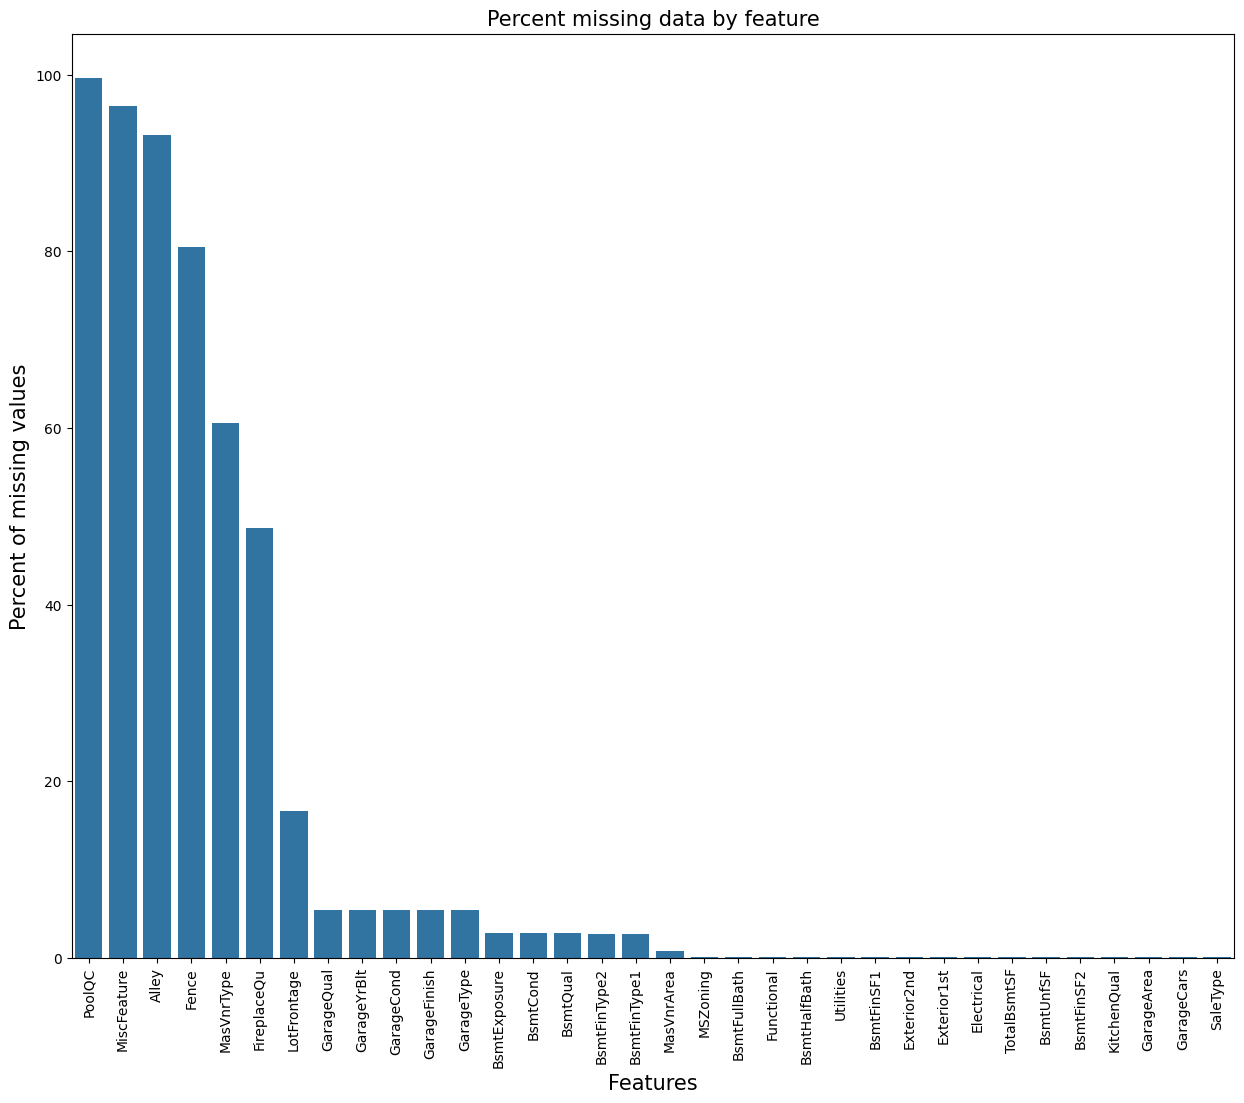

In [20]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='vertical')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [21]:
#Data Correlation

# Select only numeric columns for correlation analysis
house_df_numeric = house_df[num_cols]

# Calculate the correlation matrix
corr_matrix = house_df_numeric.corr()

# Create a heatmap using Plotly
fig = px.imshow(corr_matrix,
                text_auto=True, # Display correlation values on the heatmap
                aspect="auto", # Adjust aspect ratio
                title="Correlation Heatmap of Numeric Features")

fig.update_layout(height=800, width=800) # Adjust layout size
fig.show()


In [22]:
# Step-1 Handling mising values


#PoolQC : data description says NA means "No Pool". That make sense, given the huge ratio of missing value (+99%) and majority of houses have no Pool at all in general.
house_df["PoolQC"] = house_df["PoolQC"].fillna("None")
#MiscFeature : data description says NA means "no misc feature"
house_df["MiscFeature"] = house_df["MiscFeature"].fillna("None")
#Alley : data description says NA means "no alley access"
house_df["Alley"] = house_df["Alley"].fillna("None")
#Fence : data description says NA means "no fence"
house_df["Fence"] = house_df["Fence"].fillna("None")
#FireplaceQu : data description says NA means "no fireplace"
house_df["FireplaceQu"] = house_df["FireplaceQu"].fillna("None")

# GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with None
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):house_df[col] = house_df[col].fillna('None')

#BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : For all these categorical basement-related features, NaN means that there is no basement.
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):house_df[col] = house_df[col].fillna('None')


In [23]:
#LotFrontage : Since the area of each street connected to the house property most likely have a similar area to other houses in its
#neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
house_df["LotFrontage"] = house_df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

#GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0 (Since No garage = no cars in such garage.)
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):house_df[col] = house_df[col].fillna(0)

#BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : missing values are likely zero for having no basement
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):house_df[col] = house_df[col].fillna(0)

#MasVnrArea and MasVnrType : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.
house_df["MasVnrType"] = house_df["MasVnrType"].fillna("None")
house_df["MasVnrArea"] = house_df["MasVnrArea"].fillna(0)

#MSZoning (The general zoning classification) : 'RL' is by far the most common value. So we can fill in missing values with 'RL'
house_df['MSZoning'] = house_df['MSZoning'].fillna(house_df['MSZoning'].mode()[0])

#Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.
house_df = house_df.drop(['Utilities'], axis=1)

#Functional : data description says NA means typical
house_df["Functional"] = house_df["Functional"].fillna("Typ")

#Electrical : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.
house_df['Electrical'] = house_df['Electrical'].fillna(house_df['Electrical'].mode()[0])

#KitchenQual: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.
house_df['KitchenQual'] = house_df['KitchenQual'].fillna(house_df['KitchenQual'].mode()[0])

#Exterior1st and Exterior2nd : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string
house_df['Exterior1st'] = house_df['Exterior1st'].fillna(house_df['Exterior1st'].mode()[0])
house_df['Exterior2nd'] = house_df['Exterior2nd'].fillna(house_df['Exterior2nd'].mode()[0])

# SaleType : Fill in again with most frequent which is "WD"
house_df['SaleType'] = house_df['SaleType'].fillna(house_df['SaleType'].mode()[0])

#MSSubClass : Na most likely means No building class. We can replace missing values with None
house_df['MSSubClass'] = house_df['MSSubClass'].fillna("None")


In [24]:
missing_values_table(house_df)

           n_miss  ratio
SalePrice    1459  49.98


In [25]:
# 2. Adım: Rare Encoder uygulayınız.
cat_cols, num_cols, cat_but_car = grab_col_names(house_df)


Observations: 2919
Variables: 79
cat_cols: 42
  -> İsimleri: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
num_cols: 37
  -> İsimleri: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'Ga

In [26]:
def cat_summary(dataframe, col_name, plot=False):
    # Belirli bir kategorik sütunun değer sayısını ve oranını gösteren bir özet tablo basar.
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        # İstenirse, kategorilerin dağılımını gösteren bir çubuk grafik çizer.
        # Bu görselleştirme, hangi kategorilerin nadir olduğunu daha net görmemizi sağlar.
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()

for col in cat_cols: # Belirlenen tüm kategorik sütunlar üzerinde döngü başlatır.
    cat_summary(house_df, col) # Her bir kategorik sütun için özet istatistikleri ve oranları gösterir.


          MSZoning      Ratio
MSZoning                     
RL            2269  77.732100
RM             460  15.758822
FV             139   4.761905
RH              26   0.890716
C (all)         25   0.856458
##########################################
        Street    Ratio
Street                 
Pave      2907  99.5889
Grvl        12   0.4111
##########################################
       Alley      Ratio
Alley                  
None    2721  93.216855
Grvl     120   4.110997
Pave      78   2.672148
##########################################
          LotShape      Ratio
LotShape                     
Reg           1859  63.686194
IR1            968  33.162042
IR2             76   2.603631
IR3             16   0.548133
##########################################
             LandContour      Ratio
LandContour                        
Lvl                 2622  89.825283
HLS                  120   4.110997
Bnk                  117   4.008222
Low                   60   2.055498
######

In [27]:
#Rare kategoriler ile bağımlı değişken arasındaki ilişkinin analiz edilmesi.
def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols: # Tüm kategorik sütunlar üzerinde döngü başlatır.
        print(col, ":", len(dataframe[col].value_counts())) # Sütunun adını ve benzersiz kategori sayısını basar.
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                            "RATIO": dataframe[col].value_counts() / len(dataframe),
                            "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")
        # Her kategori için:
        # - COUNT: Kategoriye ait gözlem sayısı
        # - RATIO: Toplam gözlem içindeki oranı
        # - TARGET_MEAN: Bu kategoriye ait gözlemlerdeki hedef değişkenin ortalaması (örn. kredi temerrüt oranı)
        # Bu çıktı, hangi nadir kategorilerin hedef değişken üzerinde anlamlı bir etkiye sahip olduğunu anlamamızı sağlar.

rare_analyser(house_df, "SalePrice", cat_cols) # rare_analyser fonksiyonunu çağırır.

MSZoning : 5
          COUNT     RATIO    TARGET_MEAN
MSZoning                                
C (all)      25  0.008565   74528.000000
FV          139  0.047619  214014.061538
RH           26  0.008907  131558.375000
RL         2269  0.777321  191004.994787
RM          460  0.157588  126316.830275


Street : 2
        COUNT     RATIO    TARGET_MEAN
Street                                
Grvl       12  0.004111  130190.500000
Pave     2907  0.995889  181130.538514


Alley : 3
       COUNT     RATIO    TARGET_MEAN
Alley                                
Grvl     120  0.041110  122219.080000
None    2721  0.932169  183452.131483
Pave      78  0.026721  168000.585366


LotShape : 4
          COUNT     RATIO    TARGET_MEAN
LotShape                                
IR1         968  0.331620  206101.665289
IR2          76  0.026036  239833.365854
IR3          16  0.005481  216036.500000
Reg        1859  0.636862  164754.818378


LandContour : 4
             COUNT     RATIO    TARGET_MEAN
LandCo

In [28]:
# Rare encoder'ın yazılması.Burada belirlenen eşiğin altındaki nadir kategorileri "Rare" olarak birleştiren ana fonksiyondur.
#############################################
def rare_encoder(dataframe, rare_perc):
    temp_df = dataframe.copy() # Orijinal DataFrame'i değiştirmemek için bir kopyasını oluşturur.

    # 1. Adım: Nadir Kategorileri İçeren Sütunları Belirleme
    rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == 'O' # Sadece object (metinsel) tipindeki sütunlar.
                    and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis=None)]
                    # Ve bu sütunlarda, değerlerinin oranı 'rare_perc' eşiğinin altında olan en az bir kategori varsa.
                    # Örneğin, rare_perc = 0.01 ise, %1'den az orana sahip kategori var mı diye bakarız.
                    # Eğer varsa, o sütun rare_columns listesine eklenir.

    for var in rare_columns: # Belirlenen her nadir kategorili sütun için döngü başlatılır.
        tmp = temp_df[var].value_counts() / len(temp_df) # Her kategorinin oranını hesaplar.
        rare_labels = tmp[tmp < rare_perc].index # Oranı 'rare_perc' eşiğinin altında olan kategorilerin isimlerini (etiketlerini) alır.

        # 2. Adım: Nadir Kategorileri 'Rare' Etiketiyle Değiştirme
        temp_df[var] = np.where(temp_df[var].isin(rare_labels), 'Rare', temp_df[var])
        # Eğer bir değer 'rare_labels' içinde ise, o değeri 'Rare' ile değiştirir.
        # Aksi takdirde, orijinal değeri korur.

    return temp_df # Rare Encoding uygulanmış yeni DataFrame'i döndürür.

new_df = rare_encoder(house_df, 0.1) # df üzerinde %1'den az görülen kategorileri 'Rare' olarak kodlar.

In [29]:
new_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,Rare,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,Rare,Gtl,Rare,Rare,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Rare,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,Rare,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Rare,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,Rare,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Rare,None,0.0,TA,TA,BrkTil,TA,Rare,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Rare,140000.0
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,Rare,Gtl,Rare,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000.0


In [30]:
rare_analyser(new_df, "SalePrice", cat_cols) # Rare Encoding sonrası kategorilerin ve hedef değişkenle ilişkilerinin tekrar analiz edilmesi.
                                         #     Artık daha az benzersiz kategori ve belki de daha net ilişki görmeliyiz.


MSZoning : 3
          COUNT     RATIO    TARGET_MEAN
MSZoning                                
RL         2269  0.777321  191004.994787
RM          460  0.157588  126316.830275
Rare        190  0.065091  184188.219780


Street : 2
        COUNT     RATIO    TARGET_MEAN
Street                                
Pave     2907  0.995889  181130.538514
Rare       12  0.004111  130190.500000


Alley : 2
       COUNT     RATIO    TARGET_MEAN
Alley                                
None    2721  0.932169  183452.131483
Rare     198  0.067831  142845.912088


LotShape : 3
          COUNT     RATIO    TARGET_MEAN
LotShape                                
IR1         968  0.331620  206101.665289
Rare         92  0.031518  235167.313725
Reg        1859  0.636862  164754.818378


LandContour : 2
             COUNT     RATIO    TARGET_MEAN
LandContour                                
Lvl           2622  0.898253  180183.746758
Rare           297  0.101747  187409.758389


LotConfig : 3
           COUNT   

In [31]:
#Adım 3: Yeni değişkenler oluşturunuz.

new_df['MSSubClass'] = new_df['MSSubClass'].apply(str)

#Year ve month sold değerleri kategorik olmalı
new_df['YrSold'] = new_df['YrSold'].astype(str)
new_df['MoSold'] = new_df['MoSold'].astype(str)

In [32]:
#YearBuilt kolonundan yaşı çıkar, RemodAdd kolonu ve YearBuild aynı ise yeni bir kolona IsRemod ekle
new_df['Age'] = new_df["YrSold"].astype(int) - new_df['YearBuilt'].astype(int)
new_df['IsRemod'] = np.where(new_df['YearRemodAdd'] == new_df['YearBuilt'], 0, 1)
new_df.drop(['YearRemodAdd', 'YearBuilt',"YrSold"], axis=1, inplace=True)

In [33]:
# Add a feature for total square footage
new_df['TotalSF'] = new_df['TotalBsmtSF'] + new_df['1stFlrSF'] + new_df['2ndFlrSF']

# Add a feature for total number of bathrooms
new_df['Total_Bathrooms'] = new_df['FullBath'] + (0.5 * new_df['HalfBath']) + new_df['BsmtFullBath'] + (0.5 * new_df['BsmtHalfBath'])

# Add a feature for total number of porches
new_df['Total_Porch_SF'] = new_df['OpenPorchSF'] + new_df['3SsnPorch'] + new_df['EnclosedPorch'] + new_df['ScreenPorch']

# Check the first few rows with the new features
print(new_df[['TotalSF', 'Total_Bathrooms', 'Total_Porch_SF']].head())

   TotalSF  Total_Bathrooms  Total_Porch_SF
0   2566.0              3.5              61
1   2524.0              2.5               0
2   2706.0              3.5              42
3   2473.0              2.0             307
4   3343.0              3.5              84


In [34]:
#Yeni oluşturulan üç kolonu oluşturan kolonları düşür

new_df.drop(['TotalBsmtSF', '1stFlrSF',"2ndFlrSF","FullBath", "HalfBath", "BsmtFullBath", "BsmtHalfBath","OpenPorchSF", "3SsnPorch","EnclosedPorch", "ScreenPorch" ], axis=1, inplace=True)

In [35]:
new_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Age,IsRemod,TotalSF,Total_Bathrooms,Total_Porch_SF
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,Rare,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,GasA,Ex,Y,SBrkr,0,1710,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,0,None,None,None,0,2,WD,Normal,208500.0,5,0,2566.0,3.5,61
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,Rare,Gtl,Rare,Rare,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Rare,ALQ,978.0,Unf,0.0,284.0,GasA,Ex,Y,SBrkr,0,1262,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,None,None,None,0,5,WD,Normal,181500.0,31,0,2524.0,2.5,0
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,Rare,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Rare,GLQ,486.0,Unf,0.0,434.0,GasA,Ex,Y,SBrkr,0,1786,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,0,None,None,None,0,9,WD,Normal,223500.0,7,1,2706.0,3.5,42
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,Rare,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Rare,None,0.0,TA,TA,BrkTil,TA,Rare,No,ALQ,216.0,Unf,0.0,540.0,GasA,Gd,Y,SBrkr,0,1717,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,0,None,None,None,0,2,WD,Rare,140000.0,91,1,2473.0,2.0,307
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,Rare,Gtl,Rare,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,GasA,Ex,Y,SBrkr,0,2198,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,0,None,None,None,0,12,WD,Normal,250000.0,8,0,3343.0,3.5,84


In [36]:
new_df.shape

(2919, 70)

In [37]:
# Adım 4:  Encoding işlemlerini gerçekleştiriniz.

## Label Encoding & Binary Encoding
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    # Seçilen ikili sütunu Label Encoding'e tabi tutar.
    # Burada direkt olarak DataFrame'deki sütunu güncelliyoruz.
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

# Veri tipine (int, float olmaması) ve benzersiz değer sayısına (sadece 2) göre ikili sütunları bulur.
binary_cols = [col for col in new_df.columns if new_df[col].dtype not in [int, float]
               and new_df[col].nunique() == 2]

for col in binary_cols: # Bulunan her ikili sütun için döngü başlatılıyor.
    label_encoder(new_df, col) # Her bir ikili sütuna 'label_encoder' fonksiyonu uygulanıyor.


In [38]:
new_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Age,IsRemod,TotalSF,Total_Bathrooms,Total_Porch_SF
0,60,RL,65.0,8450,0,0,Reg,0,Inside,0,1,0,0,0,2Story,7,5,Gable,0,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,1,No,GLQ,706.0,1,0.0,150.0,0,Ex,1,1,0,1710,3,1,Gd,8,1,0,None,Attchd,2003.0,RFn,2.0,548.0,1,1,1,0,0,0,None,0,0,2,1,0,208500.0,5,0,2566.0,3.5,61
1,20,RL,80.0,9600,0,0,Reg,0,Rare,0,1,1,0,0,1Story,6,8,Gable,0,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,1,Rare,ALQ,978.0,1,0.0,284.0,0,Ex,1,1,0,1262,3,1,TA,6,1,1,TA,Attchd,1976.0,RFn,2.0,460.0,1,1,1,298,0,0,None,0,0,5,1,0,181500.0,31,0,2524.0,2.5,0
2,60,RL,68.0,11250,0,0,IR1,0,Inside,0,1,0,0,0,2Story,7,5,Gable,0,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,1,Rare,GLQ,486.0,1,0.0,434.0,0,Ex,1,1,0,1786,3,1,Gd,6,1,1,TA,Attchd,2001.0,RFn,2.0,608.0,1,1,1,0,0,0,None,0,0,9,1,0,223500.0,7,1,2706.0,3.5,42
3,70,RL,60.0,9550,0,0,IR1,0,Corner,0,1,0,0,0,2Story,7,5,Gable,0,Wd Sdng,Rare,None,0.0,TA,TA,BrkTil,TA,0,No,ALQ,216.0,1,0.0,540.0,0,Gd,1,1,0,1717,3,1,Gd,7,1,1,Gd,Detchd,1998.0,Unf,3.0,642.0,1,1,1,0,0,0,None,0,0,2,1,1,140000.0,91,1,2473.0,2.0,307
4,60,RL,84.0,14260,0,0,IR1,0,Rare,0,1,0,0,0,2Story,8,5,Gable,0,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,1,Av,GLQ,655.0,1,0.0,490.0,0,Ex,1,1,0,2198,4,1,Gd,9,1,1,TA,Attchd,2000.0,RFn,3.0,836.0,1,1,1,192,0,0,None,0,0,12,1,0,250000.0,8,0,3343.0,3.5,84


In [39]:
## One-Hot Encoding

def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    # Verilen DataFrame ve kategorik sütun listesini One-Hot Encoding'e tabi tutar.
    # 'drop_first' parametresi dışarıdan kontrol edilebilir.
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first, dtype=int)
    return dataframe

# Yeniden cat_cols'u alalım çünkü dataframe'de değişiklikler yapıldı
cat_cols, num_cols, cat_but_car = grab_col_names(new_df)

# cat_cols listesinden binary_cols'u çıkarın
cat_cols = [col for col in cat_cols if col not in binary_cols]

# Şimdi One-Hot Encoding'i uygulayın
new_df = one_hot_encoder(new_df, cat_cols)


Observations: 2919
Variables: 70
cat_cols: 22
  -> İsimleri: ['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'Fence', 'MoSold']
num_cols: 48
  -> İsimleri: ['LotFrontage', 'LotArea', 'Street', 'Alley', 'LandContour', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'OverallQual', 'OverallCond', 'RoofMatl', 'MasVnrArea', 'BsmtCond', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'PoolArea', 'PoolQC', 'MiscFeature', 'MiscVal', 'SaleType', 'SaleCondition', 'SalePrice', 'Age', 'IsRemod', 'Total

In [40]:
new_df.head()

,LotFrontage,LotArea,Street,Alley,LandContour,LandSlope,Neighborhood,Condition1,Condition2,BldgType,OverallQual,OverallCond,RoofMatl,MasVnrArea,BsmtCond,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Heating,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Functional,Fireplaces,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,PoolArea,PoolQC,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,Age,IsRemod,TotalSF,Total_Bathrooms,Total_Porch_SF,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_RM,MSZoning_Rare,LotShape_Rare,LotShape_Reg,LotConfig_Inside,LotConfig_Rare,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Rare,RoofStyle_Hip,RoofStyle_Rare,Exterior1st_MetalSd,Exterior1st_Rare,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_MetalSd,Exterior2nd_Rare,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_None,MasVnrType_Rare,ExterQual_Rare,ExterQual_TA,ExterCond_Rare,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Rare,BsmtQual_Rare,BsmtQual_TA,BsmtExposure_No,BsmtExposure_Rare,BsmtFinType1_GLQ,BsmtFinType1_Rare,BsmtFinType1_Unf,HeatingQC_Gd,HeatingQC_Rare,HeatingQC_TA,KitchenQual_Rare,KitchenQual_TA,FireplaceQu_None,FireplaceQu_Rare,FireplaceQu_TA,GarageType_Detchd,GarageType_Rare,GarageFinish_RFn,GarageFinish_Rare,GarageFinish_Unf,Fence_None,Fence_Rare,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9
0,65.0,8450,0,0,0,0,1,0,0,0,7,5,0,196.0,1,706.0,1,0.0,150.0,0,1,1,0,1710,3,1,8,1,0,2003.0,2.0,548.0,1,1,1,0,0,0,0,0,1,0,208500.0,5,0,2566.0,3.5,61,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1,80.0,9600,0,0,0,0,1,1,0,0,6,8,0,0.0,1,978.0,1,0.0,284.0,0,1,1,0,1262,3,1,6,1,1,1976.0,2.0,460.0,1,1,1,298,0,0,0,0,1,0,181500.0,31,0,2524.0,2.5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,68.0,11250,0,0,0,0,1,0,0,0,7,5,0,162.0,1,486.0,1,0.0,434.0,0,1,1,0,1786,3,1,6,1,1,2001.0,2.0,608.0,1,1,1,0,0,0,0,0,1,0,223500.0,7,1,2706.0,3.5,42,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,60.0,9550,0,0,0,0,1,0,0,0,7,5,0,0.0,0,216.0,1,0.0,540.0,0,1,1,0,1717,3,1,7,1,1,1998.0,3.0,642.0,1,1,1,0,0,0,0,0,1,1,140000.0,91,1,2473.0,2.0,307,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0
4,84.0,14260,0,0,0,0,1,0,0,0,8,5,0,350.0,1,655.0,1,0.0,490.0,0,1,1,0,2198,4,1,9,1,1,2000.0,3.0,836.0,1,1,1,192,0,0,0,0,1,0,250000.0,8,0,3343.0,3.5,84,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0


#Görev 3: Model Kurma

Adım 1:  Train ve Test verisini ayırınız. (SalePrice değişkeni boş olan değerler test verisidir.)

Adım 2:  Train verisi ile model kurup, model başarısını değerlendiriniz.

Bonus: Hedef değişkene log dönüşümü yaparak model kurunuz ve rmse sonuçlarını gözlemleyiniz. Not: Log'untersini(inverse) almayı unutmayınız.

Adım3: Hiperparemetre optimizasyonu gerçekleştiriniz.

Adım4: Değişken önem düzeyini inceleyeniz.

Bonus: Test verisinde boş olan salePrice değişkenlerini tahminleyiniz ve Kaggle sayfasına submit etmeye uygun halde bir dataframe oluşturup sonucunuzu yükleyiniz.


In [41]:
# Adım 1: Train ve Test verisini ayırınız. (SalePrice değişkeni boş olan değerler test verisidir.)

# Split the data into training and testing sets
# The test data is where 'SalePrice' is missing
train_df = new_df[new_df['SalePrice'].notna()].copy()
test_df = new_df[new_df['SalePrice'].isna()].copy()

# Separate features (X) and target (y) for the training data
X_train = train_df.drop('SalePrice', axis=1)
y_train = train_df['SalePrice']

# Separate features (X) for the test data (target is missing)
X_test = test_df.drop('SalePrice', axis=1)

print("Shape of training features (X_train):", X_train.shape)
print("Shape of training target (y_train):", y_train.shape)
print("Shape of testing features (X_test):", X_test.shape)
print("Shape of testing target (y_test - missing):", X_test.shape) # Note: y_test does not exist yet


Shape of training features (X_train): (1460, 123)
Shape of training target (y_train): (1460,)
Shape of testing features (X_test): (1459, 123)
Shape of testing target (y_test - missing): (1459, 123)


In [43]:
#Adım 2: Train verisi ile model kurup, model başarısını değerlendiriniz.

#Bir makine öğrenimi modelinin performansını Çapraz Doğrulama (Cross-Validation) yöntemiyle değerlendirmek için tasarlanmış rmsle_cv
#adında bir fonksiyon tanımlarsak. Değerlendirme metriği olarak Kök Ortalama Kare Logaritmik Hata (Root Mean Squared Logarithmic Error - RMSLE)
#kullanılmıştır.

n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)
#KFold: Bu, Scikit-learn kütüphanesinden bir çapraz doğrulama stratejisidir. Veri setini belirtilen sayıda katmana böler.
#.get_n_splits(train.values): KFold nesnesi oluşturulduktan sonra bu metot çağrılır. train.values argümanı, bölünecek veri
#setini temsil eder. Bu metot, çapraz doğrulama için kullanılacak her bir katmanın indekslerini (eğitim ve test setleri için) oluşturan
# bir iteratör döndürür. cross_val_score fonksiyonu bu iteratörü otomatik olarak kullanır.


##LASSO Regresyonu (Least Absolute Shrinkage and Selection Operator)

###Nedir?
  
* LASSO, doğrusal regresyonun bir türüdür. Temel regresyon modelleri, bağımsız değişkenler (özellikler) ile bağımlı değişken (tahmin etmeye çalıştığımız şey, örneğin SalePrice) arasındaki ilişkiyi bulmaya çalışır.

###Neden Kullanılır? (Regularizasyon ve Özellik Seçimi)

* Overfitting'i Önleme (Aşırı Uyum): Bazen modeller eğitim verilerini o kadar iyi öğrenir ki, yeni verilere genelleme yapamazlar. Buna "aşırı uyum" denir. LASSO, modelin karmaşıklığını azaltarak ve bazı özelliklerin katsayılarını sıfıra indirgeyerek bu aşırı uyumu önlemeye yardımcı olur.

* Özellik Seçimi: LASSO'nun en önemli özelliklerinden biri, bazı daha az önemli özelliklerin katsayılarını tamamen sıfıra indirme yeteneğidir. Bu, modelin otomatik olarak hangi özelliklerin tahmin için daha önemli olduğunu belirlemesine yardımcı olur. Yani, modelin gereksiz veya gürültülü özelliklerden kurtulmasını sağlar.

##2.Aykırı Değerlere Duyarlılık ("This model may be very sensitive to outliers.")
##Nedir?

* Aykırı değerler (outliers), veri setindeki diğer gözlemlerden önemli ölçüde farklı olan veri noktalarıdır.

##LASSO Neden Duyarlıdır?
* LASSO gibi regresyon modelleri, veri noktaları arasındaki ortalama kare hatayı (MSE) minimize etmeye çalışır. Aykırı değerler, bu hatayı büyük ölçüde etkileyebilir ve modelin aykırı değerlere "aşırı tepki vermesine" neden olabilir. Bu, modelin genel performansını düşürebilir ve tahminlerini güvenilmez hale getirebilir. Bu nedenle, aykırı değerlere karşı daha dayanıklı bir yaklaşım gereklidir.

##3.RobustScaler()
##Nedir?

* RobustScaler(), Scikit-learn kütüphanesindeki bir veri ölçeklendirme (data scaling) yöntemidir. Ölçeklendirme, sayısal özelliklerin değer aralıklarını benzer hale getirme işlemidir.

##Neden Kullanılır? (Aykırı Değerlere Karşı Sağlamlık)

* Geleneksel ölçekleyiciler (örneğin StandardScaler), verinin ortalamasını ve standart sapmasını kullanır. Ancak bu istatistikler aykırı değerlerden büyük ölçüde etkilenebilir.

* RobustScaler() ise verinin medyanını (ortanca) ve çeyreklikler arası aralığını (IQR - Interquartile Range) kullanır. Medyan ve IQR, aykırı değerlere karşı standart sapma ve ortalamaya göre çok daha dayanıklıdır.

* Bu nedenle, RobustScaler() aykırı değerlerin model üzerindeki etkisini azaltarak, LASSO regresyon modelini daha "sağlam" (robust) hale getirir. Yani, aykırı değerler olsa bile modelin performansının daha istikrarlı olmasını sağlar.

##4. make_pipeline()
##Nedir?

* make_pipeline(), Scikit-learn'deki bir yardımcı fonksiyondur. Bir dizi ardışık veri dönüşümünü (data transformations) ve son bir tahminciyi (estimator, yani model) bir araya getirerek bir "işlem hattı" (pipeline) oluşturur.

##Neden Kullanılır?

* İş Akışını Kolaylaştırma: Veri hazırlama (ölçeklendirme, eksik değer doldurma vb.) ve model eğitimi adımlarını tek bir nesne altında toplar.

* Veri Sızıntısını Önleme (Data Leakage): En önemlisi, çapraz doğrulama yaparken veya test setini kullanırken eğitim veri setinden test veri setine bilgi sızmasını (data leakage) engeller. Pipeline, her bir çapraz doğrulama döngüsünde (veya test seti üzerinde tahmin yaparken) ölçeklendirme gibi dönüşümleri yalnızca o anki eğitim verisi üzerinde öğrenir ve bu dönüşümleri test verisine uygular. Bu, modelin yeni verilere genelleme yeteneğini doğru bir şekilde değerlendirmek için kritik öneme sahiptir.

## 5. Lasso(alpha =0.0005, random_state=1)
* Bu, LASSO regresyon modelinin kendisini temsil eder ve iki önemli parametre ile ayarlanmıştır:

* alpha = 0.0005: Bu, LASSO regresyonundaki "regularizasyon gücü" veya "ceza terimi"dir.

* alpha değeri ne kadar yüksekse, model o kadar fazla özellik katsayısını sıfıra doğru iter ve daha basit bir model oluşturur (daha fazla özellik seçimi yapar).

* alpha değeri ne kadar düşükse, model o kadar az regularizasyon uygular ve temel doğrusal regresyona o kadar yaklaşır.

* 0.0005 gibi küçük bir değer, modelin aşırı basit olmamasını sağlarken, yine de biraz özellik seçimi ve aşırı uyumu önleme etkisi yaratır. Bu değer genellikle deneysel olarak veya çapraz doğrulama ile optimize edilir.

* random_state=1: Bu, modelin içindeki rastgele süreçler için (varsa) bir tohum (seed) ayarlar. Tıpkı KFold'daki gibi, bu parametre de modelin her çalıştırıldığında aynı sonuçları vermesini sağlayarak tekrar üretilebilirliği artırır. LASSO'da, özellikle iteratif çözücüler kullanılıyorsa veya özellik seçimi rastgelelik içeriyorsa önemlidir.

##Kodun Bütünsel Anlamı:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1)) kodu şu anlama gelir:

"LASSO regresyonu için bir model hazırlıyoruz. Bu model, veri setindeki aykırı değerlerin etkisini azaltmak amacıyla önce RobustScaler kullanarak özelliklerin değerlerini ölçeklendirecek. Ardından, alpha=0.0005 parametresiyle bir LASSO regresyonu uygulayacak. Tüm bu veri hazırlığı ve model eğitimi adımları, veri sızıntısını önlemek ve iş akışını düzenlemek için bir pipeline içinde birleştirilmiştir."



In [44]:
#Base models
# LASSO Regression :This model may be very sensitive to outliers. So we need to made it more robust on them. For that we use the sklearn's
#Robustscaler() method on pipeline

lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

##Elastic Net Regression :

Elastic Net regresyonu, hem LASSO hem de Ridge regresyonunun en iyi özelliklerini birleştiren güçlü bir doğrusal modelleme tekniğidir.

LASSO'nun özellik seçimi yapabilme (yani bazı özelliklerin katsayılarını sıfıra düşürme) yeteneğini ve Ridge'in çoklu doğrusal bağlantı (multicollinearity) durumlarında stabilite sağlama özelliğini aynı anda sunar.

Bu, modelin hem gereksiz özelliklerden kurtulmasına hem de güçlü bir şekilde ilişkili özellik kümeleriyle iyi başa çıkmasına olanak tanır, böylece daha genellenebilir ve yorumlanabilir modeller elde edilmesine yardımcı olur.


In [49]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

##Kernel Ridge Regression :


Kernel Ridge Regresyonu (KRR), standart Ridge Regresyonu'nun doğrusal olmayan ilişkilere uyum sağlayabilen gelişmiş bir versiyonudur.

Ridge Regresyonu doğrusal ilişkileri modellerken, KRR "kernel hilesi" (kernel trick) adı verilen bir teknik kullanarak verileri daha yüksek boyutlu bir uzaya eşler.

Bu sayede, orijinal uzayda doğrusal olmayan karmaşık ilişkiler bile bu yüksek boyutlu uzayda doğrusal hale getirilebilir ve Ridge Regresyonu uygulanabilir. Bu, KRR'nin hem Ridge'in regularizasyon faydalarını (aşırı uyumu önleme) korurken hem de doğrusal olmayan kalıpları yakalama yeteneği kazanmasını sağlar.

Sağladığınız kod KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5) ise bu modelin kurulumunu gösterir. Burada alpha regularizasyon gücünü, kernel='polynomial' ise veri eşlemesinde bir polinom çekirdeği kullanılacağını belirtir. degree=2 polinom çekirdeğinin derecesini (ikinci dereceden polinom), coef0=2.5 ise polinom çekirdeği için bir serbest terimi (sabit) ayarlar. Bu parametreler, modelin veriye ne kadar karmaşık bir şekilde uyum sağlayacağını ve aşırı uyuma karşı ne kadar dirençli olacağını kontrol eder.

In [50]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

- **Gradient Boosting Machines (GBM)**, makine öğrenmesindeki en güçlü ve yaygın olarak kullanılan ensemble (topluluk) öğrenme tekniklerinden biridir. Adı üzerinde, "boosting" ve "gradyan inişi" (gradient descent) kavramlarını bir araya getirir. Özellikle Kaggle yarışmaları gibi birçok veri bilimi rekabetinde yüksek başarı elde etmesiyle bilinir.
    - **Boosting + Gradient Descent**
    - Gradient boosting tek bir tahminsel model formunda olan modeller serisi oluşturur.
    - Seri içerisindeki bir model serideki bir önceki modelin tahmin artıklarını/ hatalarının (residuals) üzerine kurularak (fit) oluşturulur.
    - GBM diferansiyellenebilen herhangi bir kayıp fonksiyonunu optimize edebilen Gradient descent algoritmasını kullanmaktadır.
    - Tek bir tahminsel model formunda olan modeller serisi **additive**, sekilde kurulur.
- **Temel Prensip: Hataları Gradyan İnişi ile Düzeltme**
    
    GBM'nin ana fikri, **ardışık olarak bir dizi zayıf öğreniciyi (weak learners)** (genellikle sığ karar ağaçları, yani "karar güdükleri") eğitmek ve her yeni öğreniciyi, önceki modellerin yaptığı **hataları (residuals) veya bu hataların gradyanlarını** minimize edecek şekilde inşa etmektir.
    
    Adım adım çalışma prensibi şöyledir:
    
    1. **Başlangıç Tahmini (Initial Prediction):** Model, veri setindeki hedef değişkenin (örneğin regresyon için ortalama, sınıflandırma için log-olasılık) basit bir sabit değeriyle başlar. Bu, ilk "zayıf öğrenicidir".
    2. **Hataların Hesaplanması (Calculate Residuals/Gradients):**
        - Regresyon problemlerinde, mevcut modelin gerçek değerler ile tahminleri arasındaki **kalıntıları (residuals)** hesaplanır. Bu kalıntılar, modelin henüz açıklayamadığı "hatalardır".
        - Sınıflandırma gibi daha genel kayıp fonksiyonları için ise, bu kalıntılar doğrudan değil, kayıp fonksiyonunun mevcut tahminlere göre **negatif gradyanları (pseudo-residuals)** olarak düşünülür. Bu gradyanlar, modelin hangi yönde ilerlemesi gerektiğini gösteren "hataların yönü" gibidir.
    3. **Yeni Bir Zayıf Öğrenici Eğitme:** Yeni bir zayıf öğrenici (örneğin, küçük bir karar ağacı), **bağımsız değişkenleri (özellikler)** kullanarak **önceki adımda hesaplanan kalıntıları/gradyanları tahmin etmek** üzere eğitilir. Yani, model artık doğrudan orijinal hedef değişkeni değil, **hatanın kendisini** öğrenmeye çalışır.
    4. **Model Güncelleme:** Yeni eğitilen zayıf öğrenicinin tahmini, **küçük bir öğrenme oranı (learning rate - η) ile çarpılarak** mevcut topluluk modeline eklenir. Öğrenme oranı, her yeni ağacın toplam modele ne kadar katkıda bulunacağını kontrol eder ve aşırı öğrenmeyi (overfitting) önlemeye yardımcı olur.
        
        Fm(x)=Fm−1(x)+η⋅hm(x)
        
        Burada:
        
        - Fm(x): m. adımdaki ensemble modelinin tahmini
        - Fm−1(x): Önceki adımdaki ensemble modelinin tahmini
        - η: Öğrenme oranı
        - hm(x): m. adımda eğitilen zayıf öğrenici (kalıntıları/gradyanları tahmin eden model)
    5. **İterasyon (Tekrarlama):** Bu adımlar, belirli bir ağaç sayısına ulaşana veya model performansı artık iyileşmeyene kadar tekrarlanır. Her iterasyonda, model önceki hatalarını daha iyi anlamak ve düzeltmek için "öğrenir".

**n_estimators** (5000): Modelin kullanacağı zayıf öğrenici (ağaç) sayısını belirtir. Daha yüksek bir sayı, genellikle daha iyi performans anlamına gelir, ancak aynı zamanda eğitim süresini artırır ve aşırı uyuma yol açabilir.

**learning_rate** (0.05): Her bir ağacın modele yaptığı katkının ağırlığını kontrol eder. Küçük bir öğrenme oranı, daha fazla ağaç gerektirse de, daha sağlam bir model ve daha iyi genelleme performansı sağlayabilir.

**max_depth** (4): Her bir regresyon ağacının maksimum derinliğini tanımlar. Daha derin ağaçlar karmaşık ilişkileri öğrenebilir, ancak aşırı uyuma daha yatkındır.

**max_features** ('sqrt'): Her bir düğümdeki en iyi bölmeyi ararken dikkate alınacak özelliklerin sayısını sınırlar. 'sqrt' seçeneği, toplam özellik sayısının karekökü kadar özellik arasından seçim yapılacağı anlamına gelir.

**min_samples_leaf** (15): Bir yaprak düğümünde (ağacın sonu) bulunması gereken minimum örnek sayısını belirler. Bu, ağacın belirli bir seviyeye kadar büyümesini kısıtlayarak aşırı uyumu azaltmaya yardımcı olur.

**min_samples_split** (10): Bir düğümü bölmek için gereken minimum örnek sayısını tanımlar. Bu değer, çok az örneği olan düğümlerin bölünmesini engelleyerek modelin genelleştirme yeteneğini artırır.

**loss ('huber')**: Optimizasyon sırasında kullanılacak kayıp fonksiyonunu belirtir. 'huber' kayıp fonksiyonu, aykırı değerlere karşı MSE'den (Ortalama Kare Hata) daha az duyarlıdır ve bu sayede daha sağlam tahminler yapabilir.

**random_state (42)**: Modelin içindeki rastgele süreçler için bir tohum (seed) belirler. Bu, modelin her çalıştırıldığında aynı sonuçları vermesini sağlayarak tekrar üretilebilirliği (reproducibility) garanti eder.


In [45]:
#Gradient Boosting Regression : With huber loss that makes it robust to outliers

GBoost = GradientBoostingRegressor(n_estimators=5000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf= 15, min_samples_split=10,
                                   loss='huber', random_state =42)

**colsample_bytree** (0.4603): Her bir ağaç oluşturulurken örnekleme yapılacak özelliklerin oranını belirler. Bu, modelin aşırı uyumunu azaltmaya yardımcı olan bir alt örnekleme stratejisidir.

**gamma** (0.0468): Bir ağaç düğümünde bölme yapmak için gereken minimum kayıp azalmasını tanımlar. Daha yüksek gamma değeri, daha muhafazakar bir algoritma ve daha az sayıda bölme anlamına gelir.

**learning_rate** (0.05): Her bir boosting adımında ağacın tahminlerine uygulanan küçülme miktarını kontrol eder. Küçük bir öğrenme oranı, modelin daha yavaş öğrenmesini sağlar ve genellikle daha iyi genelleme performansı sunar.

**max_depth** (3): Her bir bireysel regresyon ağacının maksimum derinliğini belirtir. Daha küçük bir max_depth değeri, modelin aşırı uyuma daha az eğilimli olmasına yardımcı olur.

**min_child_weight** (1.7817): Bir yaprak düğümünde (bölünme sonrası) bulunması gereken minimum toplam örnek ağırlığını tanımlar. Bu parametre, ağacın küçük örnek grupları üzerinde aşırı öğrenmesini önlemeye yardımcı olur.

**n_estimators** (2200): Modelde oluşturulacak boosting ağaçlarının sayısını belirtir. Yüksek bir n_estimators değeri genellikle daha iyi performans sağlar, ancak doğru bir öğrenme oranıyla dengelenmelidir.

**reg_alpha** (0.4640): L1 regularizasyon (Lasso) teriminin ağırlığını kontrol eder. Bu, modelin özellik seçimi yapmasına ve seyrek özellik katsayıları üretmesine yardımcı olur.

**reg_lambda** (0.8571): L2 regularizasyon (Ridge) teriminin ağırlığını kontrol eder. Bu, modelin katsayılarının boyutunu küçülterek aşırı uyumu azaltır.

**subsample** (0.5213): Her bir ağaç oluşturulurken kullanılacak eğitim örneklerinin oranını belirler. Bu, modelin daha çeşitli ağaçlar öğrenmesine ve varyansı azaltmasına yardımcı olur.

**silent** (1): Model eğitim sırasında çıktı mesajlarının sessiz (gösterilmemesi) olmasını sağlar. 1 değeri çıktıları sustururken, 0 değeri çıktıların gösterilmesini sağlar.

**random_state** (7): Modelin içindeki rastgele süreçler için bir tohum (seed) belirler. Bu, kodun her çalıştırıldığında aynı sonuçları vermesini sağlayarak tekrar üretilebilirliği sağlar.

**nthread** (-1): XGBoost'un kullanacağı CPU çekirdeklerinin sayısını belirler. -1 değeri, mevcut tüm çekirdekleri kullanması anlamına gelir, bu da eğitim hızını artırır.



In [46]:
#XGBoost :
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468,
                             learning_rate=0.05, max_depth=3,
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

**objective ('regression')**: Bu, modelin optimizasyon hedefini belirtir; 'regression' regresyon problemleri için ortalama kare hatayı (L2) minimize etmeyi hedefler. Diğer yaygın hedefler arasında lojistik regresyon için 'binary' veya 'multiclass' bulunur.

**num_leaves** (5): Her bir ağaçtaki maksimum yaprak (terminal) düğüm sayısını tanımlar. Daha az yaprak, ağacın daha basit ve aşırı uyuma daha az eğilimli olmasını sağlar.

**learning_rate** (0.05): Her bir ağacın modele yaptığı katkının ağırlığını kontrol eder. Küçük bir öğrenme oranı, modelin daha yavaş öğrenmesini sağlar ve genellikle daha iyi genelleme performansı sunar.

**n_estimators** (720): Boosting sürecinde oluşturulacak iterasyon veya ağaç sayısını belirtir. Daha yüksek bir sayı, genellikle daha iyi performans anlamına gelir, ancak aşırı uyuma ve daha uzun eğitim süresine yol açabilir.

**max_bin** (55): Özellik değerlerini gruplandırmak için kullanılacak maksimum kutu (bin) sayısını tanımlar. Daha düşük bir max_bin değeri, eğitim hızını artırabilir ancak modelin doğruluk kaybetmesine neden olabilir.

**bagging_fraction** (0.8): Her bir iterasyonda (ağaç oluşturma) rastgele seçilecek veri örneklerinin oranını belirtir. Bu, modelin varyansını azaltarak aşırı uyumu önlemeye yardımcı olur.

**bagging_freq** (5): Bagging'in (veri alt örneklemesi) kaç iterasyonda bir yapılacağını belirtir. bagging_freq=5 demek, her 5 iterasyonda bir yeni bir örneklem setinin oluşturulması anlamına gelir.

**feature_fraction** (0.2319): Her bir iterasyonda (ağaç oluşturma) rastgele seçilecek özelliklerin (sütunların) oranını belirler. Bu, modelin çeşitliliğini artırır ve aşırı uyumu azaltır.

**feature_fraction_seed** (9): feature_fraction tarafından kullanılan rastgele tohumu belirler. Bu, özellik alt örnekleme işleminin tekrar üretilebilirliğini sağlar.

**bagging_seed** (9): bagging_fraction tarafından kullanılan rastgele tohumu belirler. Bu, veri alt örnekleme işleminin tekrar üretilebilirliğini sağlar.

**min_data_in_leaf** (6): Bir yaprak düğümünde (terminal düğüm) bulunması gereken minimum veri örneği sayısını tanımlar. Bu, çok az örneği olan yaprakların oluşmasını engelleyerek aşırı uyumu azaltır.

**min_sum_hessian_in_leaf** (11): Bir yaprak düğümünde (terminal düğüm) bulunması gereken minimum toplam Hessien değerini belirler. Bu parametre, ağaçların çok küçük veya önemsiz yaprak düğümleri oluşturmasını önlemeye yardımcı olur.



In [48]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

##Base Models Scores:

In [53]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 26679.3292 (4767.8322)



##Bonus: Hedef değişkene log dönüşümü yaparak model kurunuz ve rmse sonuçlarını gözlemleyiniz.


 mu = 180921.20 and sigma = 79415.29



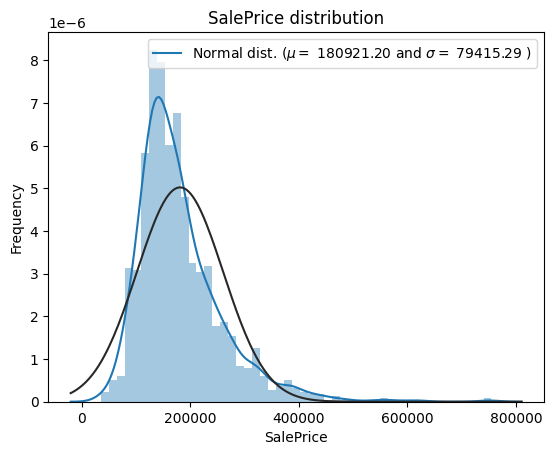

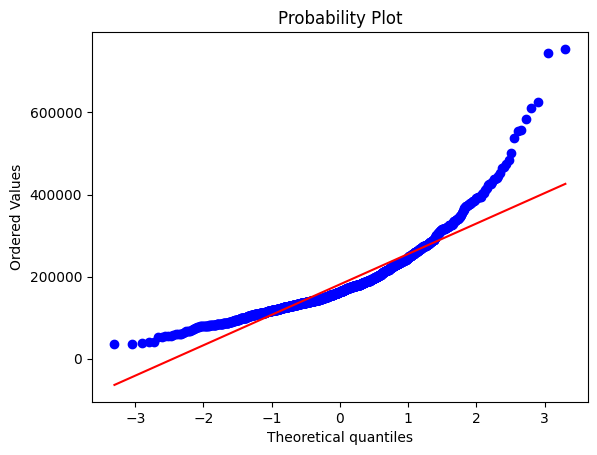

In [58]:
#Target Variable --> SalePrice is the variable we need to predict. So let's do some analysis on this variable first.

sns.distplot(y_train , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(y_train)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(y_train, plot=plt)
plt.show()


 mu = 12.02 and sigma = 0.40



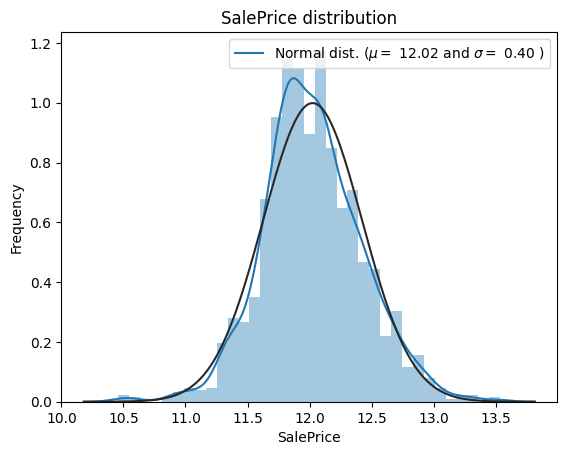

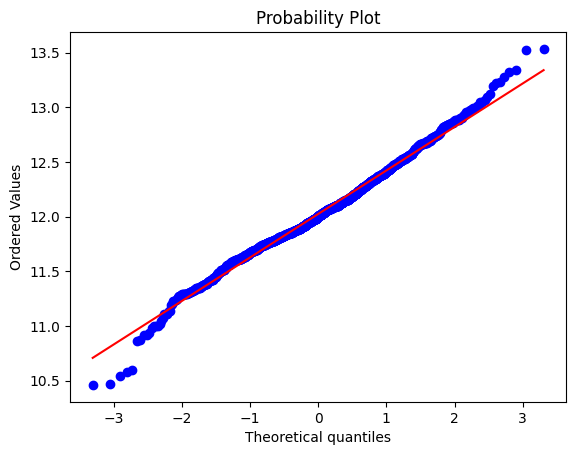

In [59]:
#The target variable is right skewed. As (linear) models love normally distributed data , we need to transform this variable and make it more normally distributed.
#Log-transformation of the target variable

#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
y_train = np.log1p(y_train)

#Check the new distribution
sns.distplot(y_train , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(y_train)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(y_train, plot=plt)
plt.show()


In [60]:
#Hedef değişkene log dönüşümüyaparakmodel kurunuzvermsesonuçlarınıgözlemleyiniz.
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.1269 (0.0091)



In [63]:
#Hiperparametre optimizasyonu
model_xgb_params = {"learning_rate": [0.1, 0.01],
                  "max_depth": [5, 8],
                  "n_estimators": [100, 500, 1000],
                  "colsample_bytree": [0.7, 1]}

xgboost_best_grid = GridSearchCV(model_xgb, model_xgb_params, cv=5, n_jobs=-1, verbose=True).fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=0.4603, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=0.0468,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0....
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=3, max_leaves=None,
                                    min_child_weight=1.7817, missing=nan,
          

In [66]:
model_xgb_final = model_xgb.set_params(**xgboost_best_grid.best_params_, random_state=17).fit(X_train, y_train)

In [67]:
#Final Modeli Skoru
score = rmsle_cv(model_xgb_final)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.1285 (0.0087)



In [71]:
#Adım 4: Değişken önem düzeyini inceleyeniz.
def plot_importance(model, features, num=None, save=False):
    if num is None:
        num = len(features.columns)

    feature_imp = pd.DataFrame({
        'Feature': features.columns,
        'Importance': model.feature_importances_
    }).sort_values(by="Importance", ascending=False).head(num)

    fig = px.bar(
        feature_imp,
        x='Importance',
        y='Feature',
        orientation='h',
        title='Feature Importances',
        width=1000,
        height=1600
    )

    fig.update_layout(yaxis={'categoryorder':'total ascending'})  # En önemli en üstte
    fig.show()

    if save:
        fig.write_image("importances_plotly.png")


plot_importance(model_xgb_final, X_train)


In [73]:
xgb_pred = np.expm1(model_xgb_final.predict(X_test))

In [74]:
xgb_pred

array([122306.48, 165066.  , 184998.08, ..., 163007.77, 117776.75,
       215827.61], dtype=float32)

In [81]:
test_df = pd.read_csv('/content/sample_data/test.csv')

In [82]:
#Submission:
sub = pd.DataFrame()
sub['Id'] = test_df['Id']
sub['SalePrice'] = xgb_pred
sub.to_csv('submission.csv',index=False)